In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [15]:
met_df_1 = pd.read_csv("/Users/joelforster/Projects/optidb/metrics/14-21metrics.csv")
met_df_2 = pd.read_csv("/Users/joelforster/Projects/optidb/metrics/4-53metrics.csv")
met_df_3 = pd.read_csv("/Users/joelforster/Projects/optidb/metrics/8-33metrics.csv")

met_df_4 = pd.read_csv("/Users/joelforster/Projects/optidb/metrics/5-45metrics.csv")
met_df_5 = pd.read_csv("/Users/joelforster/Projects/optidb/metrics/6-40metrics.csv")
met_df_6 = pd.read_csv("/Users/joelforster/Projects/optidb/metrics/7-34metrics.csv")

met_df_7 = pd.read_csv("/Users/joelforster/Projects/optidb/metrics/9-27metrics.csv")
met_df_8 = pd.read_csv("/Users/joelforster/Projects/optidb/metrics/10-25metrics.csv")
met_df_9 = pd.read_csv("/Users/joelforster/Projects/optidb/metrics/11-22metrics.csv")

In [135]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
(188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

tab20 = [tuple([float(c)/255.0 for c in t]) for t in tableau20]

In [26]:
met_net = pd.read_csv("/Users/joelforster/Projects/optidb/sep-multi2/opti-net0.3.csv")

In [31]:
met_net.columns

Index([u'Ligand Number', u'Mean Affinity', u'Fitness', u'Mean Budding Time',
       u'Budding Rate', u'Density', u'Max Diameter', u'Mean Diameter',
       u'Min Diameter', u'Min Radius', u'Mean Radius', u'Max Radius',
       u'Max Average Shortest Path', u'Mean Average Shortest Path',
       u'Min Average Shortest Path', u'Subgraph Number',
       u'Estrada Coefficient', u'Pruning', u'Max SmallWorld',
       u'Mean SmallWorld', u'Min SmallWorld'],
      dtype='object')

In [73]:
means = []
stds = []
ns = []
for i in met_net['Ligand Number'].unique():
    for j in met_net[met_net['Ligand Number']==i]['Mean Affinity'].unique():
        q = met_net[(met_net['Ligand Number']==i) & (met_net['Mean Affinity']==j) & (met_net['Fitness']>0)]
        means.append([i,j,q[q['Mean Budding Time']>0]['Mean Budding Time'].mean(),q['Fitness'].mean(),len(q),len(q[q['Mean Budding Time']>0])])
        stds.append([i,j,q[q['Mean Budding Time']>0]['Mean Budding Time'].std(),q['Fitness'].std(),len(q),len(q[q['Mean Budding Time']>0])])

In [74]:
met_stds = pd.DataFrame(columns=['Ligand Number','Mean Affinity','Mean Budding Time','Fitness','NFit','NBud'],data=stds)
met_means = pd.DataFrame(columns=['Ligand Number','Mean Affinity','Mean Budding Time','Fitness','NFit','NBud'],data=means)

In [76]:

met_stds[(met_stds['Ligand Number']==21)&(met_stds['Mean Affinity']==14)]

,Ligand Number,Mean Affinity,Mean Budding Time,Fitness,NFit,NBud
4,21,14.0,2528.978393,80.505855,2880,2568


In [77]:
met_means[(met_means['Ligand Number']==21)&(met_means['Mean Affinity']==14)]

,Ligand Number,Mean Affinity,Mean Budding Time,Fitness,NFit,NBud
4,21,14.0,14228.38785,380.295998,2880,2568


In [122]:
df_1421 = pd.read_csv("/Users/joelforster/14-21.csv")
df_453 = pd.read_csv("/Users/joelforster/4-53.csv")
df_833 = pd.read_csv("/Users/joelforster/8-33.csv")

In [123]:
def genFitnessCurve(df):
    d=[]
    for g in df['gen_id'].unique():
        q = df[df['gen_id']==g]
        q2 = df[(df['gen_id']==g) & (df['bud_time']>0)]
        d.append([g,q['fitness'].mean(),q['fitness'].std(),len(q),q2['bud_time'].mean(),q2['bud_time'].std(),len(q2)])
    return pd.DataFrame(columns=['Generation','Mean Fitness','Std Fitness','NFitness','Mean Budding Time','Std Budding Time','NBudding Time'],data=d)

In [124]:
mdf_1421 = genFitnessCurve(df_1421)
mdf_453 = genFitnessCurve(df_453)
mdf_833 = genFitnessCurve(df_833)

In [125]:
e1421=[i[0]*(1.0/np.sqrt(float(i[1]))) for i in mdf_1421[['Std Fitness','NFitness']].values]
e453=[i[0]*(1.0/np.sqrt(float(i[1]))) for i in mdf_453[['Std Fitness','NFitness']].values]
e833=[i[0]*(1.0/np.sqrt(float(i[1]))) for i in mdf_833[['Std Fitness','NFitness']].values]

<ErrorbarContainer object of 3 artists>

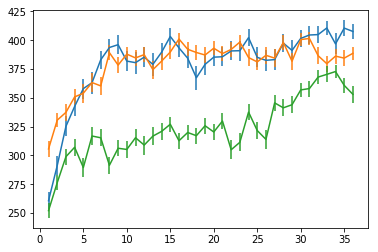

In [131]:
plt.errorbar(mdf_1421['Generation'],mdf_1421['Mean Fitness'],yerr=e1421,label="$N=21, \epsilon=14kT$")
plt.errorbar(mdf_833['Generation'],mdf_833['Mean Fitness'],yerr=e833,label="$N=33, \epsilon=8kT$")
plt.errorbar(mdf_453['Generation'],mdf_453['Mean Fitness'],yerr=e453,label="$N=53, \epsilon=4kT$")

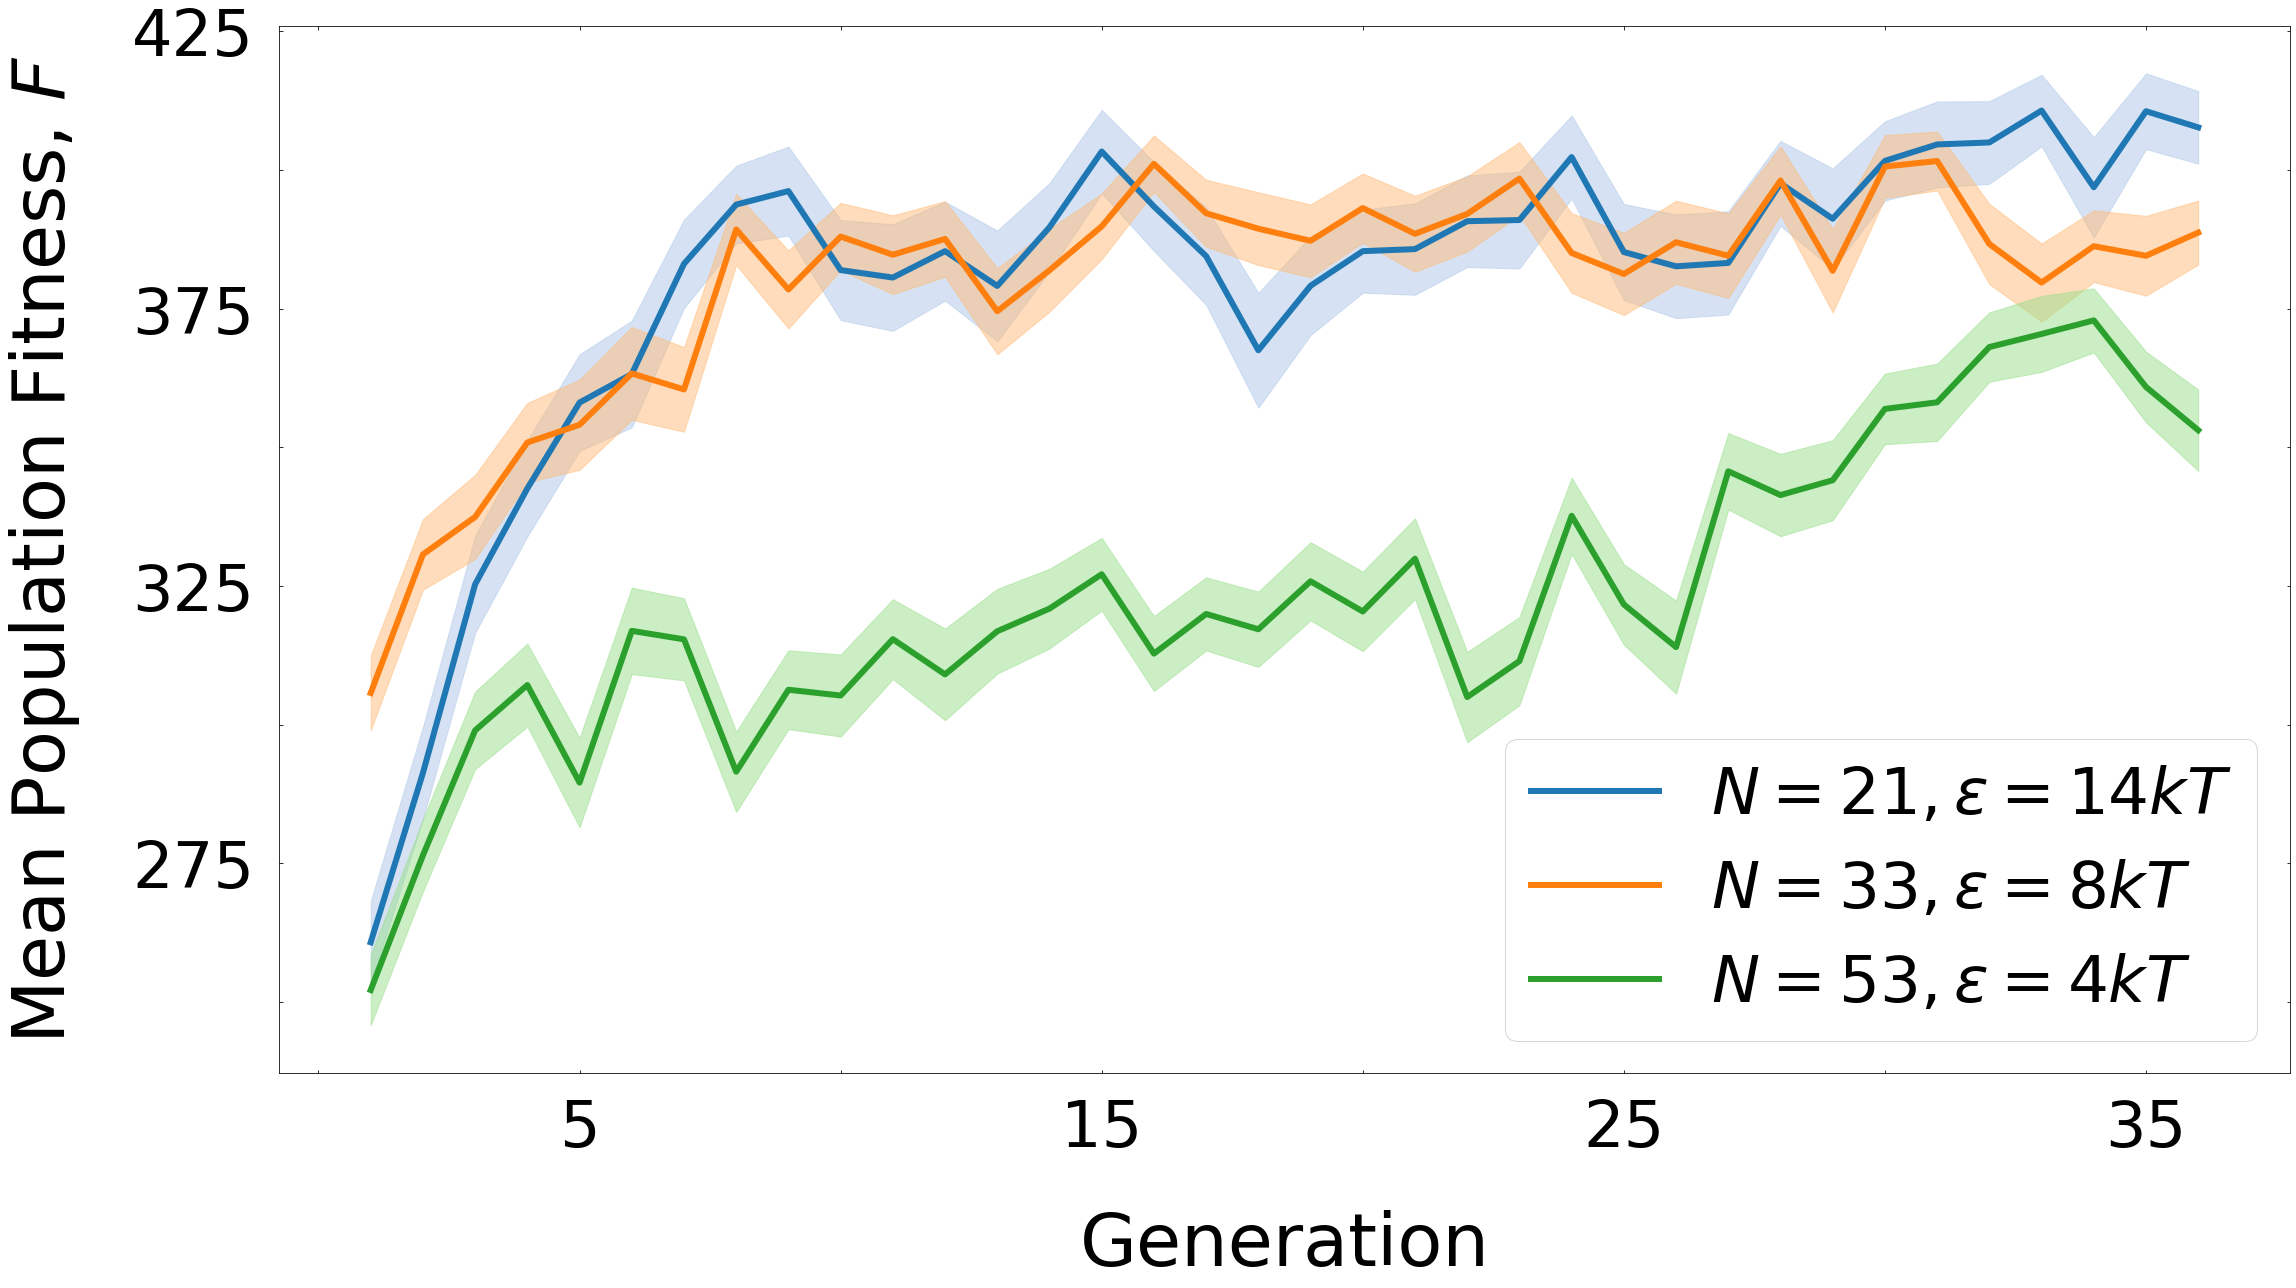

In [139]:
plt.figure(figsize=(16*2.0,9*2.0))

factor=2.0
padding=0.025

labelSize=32
tickSize=32

ax = plt.subplot(111)

ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False) 

lw=6.0


plt.errorbar(mdf_1421['Generation'],mdf_1421['Mean Fitness'],label="$N=21, \epsilon=14kT$",linewidth=lw,color=tab20[0])
plt.errorbar(mdf_833['Generation'],mdf_833['Mean Fitness'],label="$N=33, \epsilon=8kT$",linewidth=lw,color=tab20[2])
plt.errorbar(mdf_453['Generation'],mdf_453['Mean Fitness'],label="$N=53, \epsilon=4kT$",linewidth=lw,color=tab20[4])



ax.fill_between(mdf_1421['Generation'],mdf_1421['Mean Fitness']+e1421, mdf_1421['Mean Fitness']-e1421,color=tab20[1], interpolate=True,alpha=0.5)
ax.fill_between(mdf_833['Generation'],mdf_833['Mean Fitness']+e833, mdf_833['Mean Fitness']-e833,color=tab20[3], interpolate=True,alpha=0.5)
ax.fill_between(mdf_453['Generation'],mdf_453['Mean Fitness']+e453, mdf_453['Mean Fitness']-e453,color=tab20[5], interpolate=True,alpha=0.5)

# ax.fill_between(binnedLigandNum,yerrnobud1, yerrnobud2, where=yerrnobud2 >= yerrnobud1, facecolor=tab20[3], interpolate=True,alpha=0.5)


# plt.errorbar([i for i in range(35)],met_df_1['avg'].values.tolist()[:35],label="$N=21, \epsilon=14.0kT$",linewidth=lw)
# # plt.plot([i for i in range(35)],met_df_9['avg'].values.tolist()[:35],label="$N=22, \epsilon=11.0kT$",linewidth=lw)
# # plt.plot([i for i in range(35)],met_df_8['avg'].values.tolist()[:35],label="$N=25, \epsilon=10kT$",linewidth=lw)
# # plt.plot([i for i in range(35)],met_df_7['avg'].values.tolist()[:35],label="$N=27, \epsilon=9.0kT$",linewidth=lw)
# plt.plot([i for i in range(35)],met_df_3['avg'].values.tolist()[:35],label="$N=33, \epsilon=8.0kT$",linewidth=lw)

# plt.plot([i for i in range(35)],met_df_2['avg'].values.tolist()[:35],label="$N=53, \epsilon=4.0kT$",linewidth=lw)
# # plt.plot([i for i in range(35)],met_df_6['avg'].values.tolist()[:35],label="$N=34, \epsilon=7.0kT$",linewidth=lw)
# # plt.plot([i for i in range(35)],met_df_5['avg'].values.tolist()[:35],label="$N=40, \epsilon=6.0kT$",linewidth=lw)
# # plt.plot([i for i in range(35)],met_df_4['avg'].values.tolist()[:35],label="$N=45, \epsilon=5.0kT$",linewidth=lw)


plt.ylabel("Mean Population Fitness, $F$",fontsize=labelSize*factor*1.15,labelpad=25*factor)
plt.xlabel("Generation",fontsize=labelSize*factor*1.15,labelpad=25*factor)
    
plt.xticks(fontsize=tickSize*factor)
plt.yticks(fontsize=tickSize*factor)
ax.spines["top"].set_visible(True)    
ax.spines["bottom"].set_visible(True)    
ax.spines["right"].set_visible(True)    
ax.spines["left"].set_visible(True) 
ax.get_xaxis().tick_bottom()    
ax.get_yaxis().tick_left()   
    
#     ax.set_yl

plt.tick_params(axis="both", which="both", bottom="on", top="on",    
                    labelbottom="on", left="on", right="on", labelleft="on",direction='in')  

plt.gca().tick_params(axis='x', which='major', pad=25)
plt.gca().tick_params(axis='y', which='major', pad=25)

every_nth = 2
for n, l in enumerate(plt.gca().yaxis.get_ticklabels()):
    if n % every_nth != 0:
        l.set_visible(False)
for n, l in enumerate(plt.gca().xaxis.get_ticklabels()):
    if n % every_nth != 0:
        l.set_visible(False)
    
plt.legend(loc='best',fontsize=labelSize*1.75*1.15)
plt.tight_layout()

plt.savefig('/Users/joelforster/Projects/Figures/eps/metric.eps', format='eps', dpi=1000)
plt.savefig('/Users/joelforster/Projects/Figures/png/metric.png')
plt.savefig('/Users/joelforster/Projects/Figures/svg/metric.svg', format='svg')


plt.show()